In [1]:
import pickle
import numpy as np
import matplotlib.pylab as plt

In [2]:
with open('EX03_DW', 'rb') as f:
    prior = pickle.load(f)
    likelihood = pickle.load(f)
    std = pickle.load(f)

In [3]:
with open('EX03_DW_BVI', 'rb') as f:
    BVI = pickle.load(f)

In [4]:
with open('EX03_DW_ARC', 'rb') as f:
    ARC = pickle.load(f)

Load simulated trajectory and observations

In [5]:
true_sde_pts, true_sde_trj = prior[0], prior[1]
obs, obs_time = likelihood[0], likelihood[1]
sde_sigma, obs_sigma = std[0], std[1]

Load the approximate posterior from GP-BVI

In [6]:
vp__pts, vp__mean, vp__std, vp__pars, vp__grads = BVI[0], BVI[1], BVI[2], BVI[3], BVI[4]

Load the approximate posterior from GP-SDE (Archambeau et al)

In [7]:
b, A, m, S, psi, lamda, KL = ARC[0], ARC[1], ARC[2], ARC[3], ARC[4], ARC[5], ARC[6]

**GP-SDE vs GP-BVI: Under high observational variance**

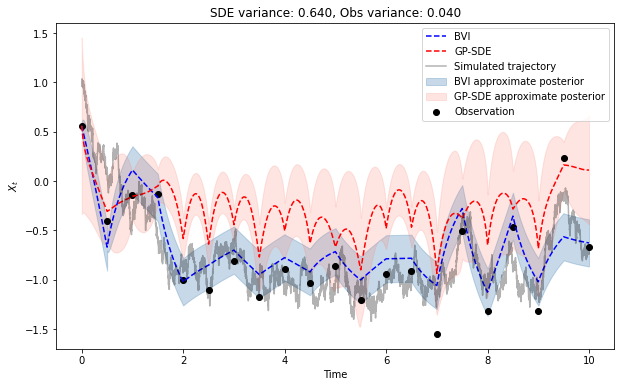

In [13]:
plt.figure(figsize=(10,6))
plt.plot(vp__pts.T, vp__mean.T, color='blue', linestyle='dashed', label='BVI')
plt.fill_between(vp__pts, vp__mean + vp__std, 
                 vp__mean - vp__std, alpha=0.3, 
                 color='steelblue',
                 label='BVI approximate posterior')


plt.plot(true_sde_pts, m[:, 0], color='red', linestyle='dashed', zorder=2, label="GP-SDE")
plt.fill_between(true_sde_pts,
                 m[:, 0] - S[:, 0, 0] ** 0.5,
                 m[:, 0] + S[:, 0, 0] ** 0.5,
                 color='salmon',
                 alpha=0.2,
                 zorder=1,
                 label='GP-SDE approximate posterior')

plt.plot(true_sde_pts, true_sde_trj, 
        alpha=0.3, color='black',
        label='Simulated trajectory')
plt.scatter(obs_time, obs, color='black', label='Observation')

plt.xlabel("Time")
plt.ylabel(r"$X_{t}$")
plt.legend()
plt.title("SDE variance: %.3f" % (sde_sigma**2) + ", Obs variance: %.3f" % (obs_sigma ** 2))
# plt.savefig("figures/EX03_DW/Figure_01")
plt.show()

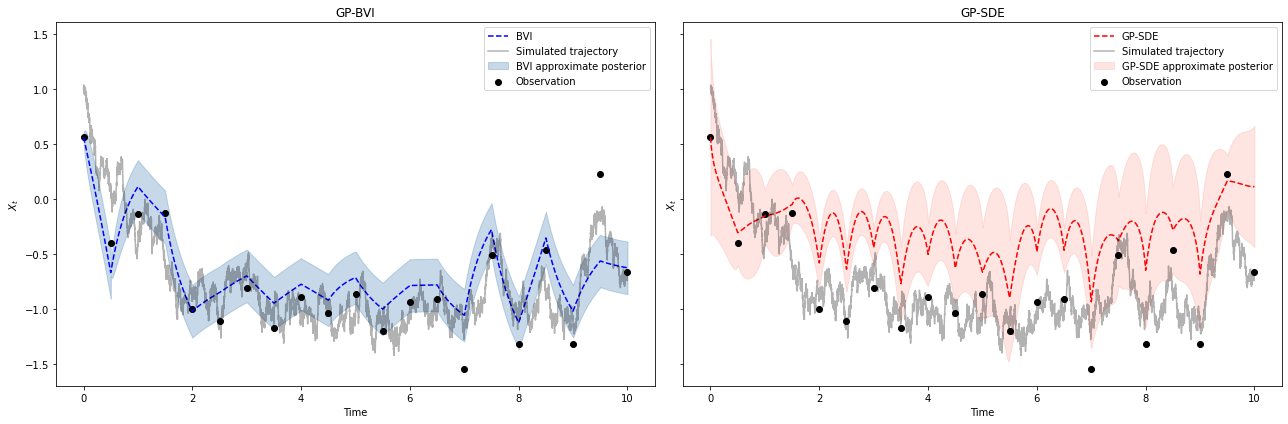

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharey='all')

axs[0].plot(vp__pts.T, vp__mean.T, color='blue', linestyle='dashed', label='BVI')
axs[0].fill_between(vp__pts, vp__mean + vp__std, 
                 vp__mean - vp__std, alpha=0.3, 
                 color='steelblue',
                 label='BVI approximate posterior')
axs[0].set_title("GP-BVI")

axs[1].plot(true_sde_pts, m[:, 0], color='red', linestyle='dashed', zorder=2, label="GP-SDE")
axs[1].fill_between(true_sde_pts,
                 m[:, 0] - S[:, 0, 0] ** 0.5,
                 m[:, 0] + S[:, 0, 0] ** 0.5,
                 color='salmon',
                 alpha=0.2,
                 zorder=1,
                 label='GP-SDE approximate posterior')
axs[1].set_title("GP-SDE")

for ax in axs.ravel(): 
    ax.plot(true_sde_pts, true_sde_trj, 
            alpha=0.3, color='black',
            label='Simulated trajectory')
    ax.scatter(obs_time, obs, color='black', label='Observation')

    ax.set_xlabel("Time")
    ax.set_ylabel(r"$X_{t}$")
    ax.legend()
plt.tight_layout()
# plt.savefig("figures/EX03_DW/Figure_02")
plt.show()